## Objective- Implement SGD to Linear Regression

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
# Loading of Boston dataset
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
# Shape of data
print(boston.data.shape)

(506, 13)


In [4]:
# Number of rows
print(boston.data.shape[0])

506


In [5]:
# Number of columns
print(boston.data.shape[1])

13


In [6]:
# Columns Name of Boston dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Importing Data

In [7]:
# Dividing dataset into data(input variables) and target(output variable) 
X = pd.DataFrame(boston.data)
Y = pd.DataFrame(boston.target)

In [8]:
# Preprocessing of data
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_data=pd.DataFrame(scaler.transform(X))

In [9]:
#Concatenating Input and output variables into a single DataFrame
data = pd.concat([X_data,Y], axis=1,ignore_index=True)

In [10]:
#Printing Top 5 rows
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


## SGD regressor of Sklearn

In [11]:
import warnings
warnings.filterwarnings("ignore")

#Applying SGDRegressor() and fitting the model on Data 
clf = SGDRegressor()
clf.fit(X_data, Y)

#Printing the mean square error (Actual Y- Predicted Y)
print(mean_squared_error(Y, clf.predict(X_data)))

22.782371903483956


In [12]:
# Finding the intercept value
clf.intercept_

array([22.35309641])

In [13]:
# individual weights and storing as list in Dataframe
SGD_wght=pd.DataFrame(list(clf.coef_))

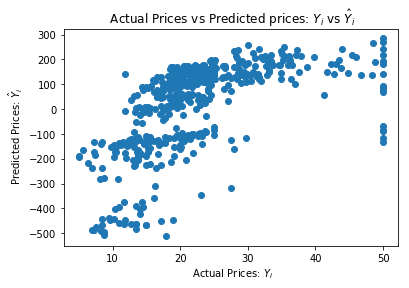

In [14]:
#Plotting the Scatter plot of Predicted vs Actual price of Boston dataset
plt.scatter(Y, clf.predict(X))
plt.xlabel(" Actual Prices: $Y_i$")
plt.ylabel(" Predicted Prices: $\hat{Y}_i$")
plt.title(" Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Manual SGD implementation

In [27]:
#Taking random weight vector 'w' into Dataframe
w=pd.DataFrame(X_data.loc[0,:])

w=w.T   #Changing into row vector as default type is column vector
w       #Printing the weight vector 'w'

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417713,0.28483,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459,0.441052,-1.075562


In [28]:
b=0   #Choosing Default value of intercept(scalar)
r=1   #Learning rate(r)

In [29]:
# Reference: https://stackoverflow.com/questions/50328545/stochastic-gradient-descent-for-linear-regression-on-partial-derivatives
while(True):
    
    random_data=data.sample(100)  #Taking the random data of 100 samples
    
    random_data=random_data.reset_index(drop=True)
    
    X=random_data.loc[:,0:12]  #Taking all the input variables needed to predict the class label
    Y=random_data.loc[:,13]    #Taking the output variable(class label)
    
    w_optimized=0.0
    b_optimized=0.0
    
    for k in range(100):
        # -2x * (y-(mx +b)) 
        w_optimized= w_optimized+(-2*X.loc[k]*(Y.loc[k]-np.dot(X.loc[k],w.T)-b))
        
         # -2(y - (mx + b)) 
        b_optimized=b_optimized+(float(-2*(Y.loc[k]-np.dot(X.loc[k],w.T)-b)))
    
    #updating the parameters
    w0=w-r*(w_optimized/100)
    b0=b-r*(b_optimized/100)
    
    r=r/2  #reducing the learning rate to half in each iteration
    
    #Comparing whether the obtained w is same as previous w 
    if(np.array(w)==np.array(w0)).all():
        break;
    else:
        w=w0 #updating the value of w in each iteration
        b=b0 #updating the value of b in each iteration
        

In [30]:
# Obtained value of weight vector
w0

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.239091,0.973096,-0.278184,-2.432222,-0.827658,4.525984,2.053458,-0.699801,1.469536,1.529945,0.762057,0.361148,-0.520188


In [31]:
b0

22.87076428299188

In [32]:
y_pred=[]
X=data.loc[:,0:12]
y=data.loc[:,13]

for i in range(506):
     # Determining the hyperplane using the formula, y=mx+c
     # where m=w0.T(vector),x=X[i] i=0,1,2..506 , c=b0(scalar)
    y_pred.append(np.dot(X.loc[i],w0.T)+b0)
    
y_pred=np.asarray(y_pred)

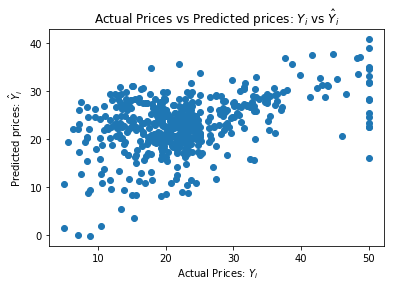

In [33]:
#Plotting the Scatter plot of Predicted vs Actual price of Boston dataset
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.xlabel(" Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [36]:
#Printing the mean square error (Actual Y- Predicted Y)
print(mean_squared_error(y,y_pred))

24.14143389935003


# Summary

In [37]:
#plotting the obtained results in Tabular form
from prettytable import PrettyTable   
x = PrettyTable()
x.field_names = ["Parameters", "Manual SGD", "Sklearn SGD"]
x.add_row(["Mean Squared error",  24.1414, 22.7823])
x.add_row(["Intercept term ",  22.5334, 22.3530])
print(x)

+--------------------+------------+-------------+
|     Parameters     | Manual SGD | Sklearn SGD |
+--------------------+------------+-------------+
| Mean Squared error |  24.1414   |   22.7823   |
|  Intercept term    |  22.5334   |    22.353   |
+--------------------+------------+-------------+


* The mean square error obtained from Manual SGD is almost similar to the mean square error obtained from the Sklearn SGD with small difference.
* The intercept term is also similar in both the cases.

In [38]:
#https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output
from IPython.display import HTML, display
import tabulate
print("Manual SGD weights")
display(HTML(tabulate.tabulate(w0,tablefmt='html',showindex=False)))
print("Sklearn SGD weights")
display(HTML(tabulate.tabulate(SGD_wght.T,tablefmt='html',showindex=False)))


Manual SGD weights


-3.23909,0.973096,-0.278184,-2.43222,-0.827658,4.52598,2.05346,-0.699801,1.46954,1.52994,0.762057,0.361148,-0.520188


Sklearn SGD weights


-0.697901,0.695221,-0.453927,0.774562,-0.865385,3.08178,-0.0128706,-2.1502,0.959273,-0.624628,-1.67226,0.87231,-3.50132
